In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, fbeta_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from umap import UMAP

In [2]:
test_df = pd.read_csv('./data/class_test.csv')
train_df = pd.read_csv('./data/class_train.csv')

### 2.1 Data analysis

In [3]:
concat_df = pd.concat([test_df, train_df])

In [4]:
concat_df.shape

(116, 160)

In [5]:
concat_df.describe()

,Plasma renin activity,Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article,Oxygen saturation,17α-Hydroxyprogesterone,Anti ds-DNA,Reticulocyte hemoglobin equivalent,Fibrinogen,Procalcitonin,SHBG -more detailed ranges in SHBG article,[H+],...,Luteinizing hormone (LH)-more detailed menstrual cycle ranges in separate diagram,Alpha 1-antitrypsin (AAT),Eosinophil cationic protein (ECP),Absolute content of carbon dioxide (CO2),Chloride (Cl),Amylase,IgM,Copper (Cu),Viscosity,Outcome
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1397.346010,8.230417,8.045073,12184.702129,908.822030,2466.302301,7968.517631,413.760661,11916.589027,2762.817713,...,15065.529595,7.210626,2894.964683,7.344701,11288.014642,7.762595,6641.767308,7.316009,11026.802770,0.551724
std,321.323243,5.826776,6.182216,2866.106859,191.909497,583.469098,1744.304821,83.151072,2657.316862,657.354381,...,3730.556824,5.419995,716.210067,5.826970,2866.122202,5.807348,1398.213177,5.175228,2677.489720,0.499475
min,953.895798,0.006976,0.013735,8181.376094,637.176162,1606.945756,5518.843898,291.276226,7834.819418,1641.900914,...,9446.175374,0.159007,1898.150850,0.057244,7405.484356,0.178915,4644.152278,0.025516,6961.452208,0.000000
25%,1202.926778,3.426605,2.770514,10339.481188,787.441129,2113.501732,6745.358858,357.447284,10264.680588,2319.567901,...,12767.476157,2.880577,2415.489452,3.118951,9392.334222,3.580492,5792.977792,3.000158,9372.633905,0.000000
50%,1314.383750,6.533316,7.249626,11456.561327,877.324827,2305.793236,7654.728192,402.385246,11232.842240,2702.861677,...,14260.298054,5.645545,2762.972427,5.900408,10498.071070,7.060184,6401.506060,6.826692,10503.611056,1.000000
75%,1516.568905,12.825365,11.621370,13134.871341,989.564344,2714.638853,8655.803182,452.149374,12847.353697,3030.492834,...,16302.060739,11.144046,3185.534540,10.298938,12693.954672,10.560377,7125.618139,11.410409,11980.339257,1.000000
max,3032.716622,24.874929,31.516674,25987.040394,1796.244934,5397.214939,16495.702928,782.718144,24773.080464,5679.364743,...,33311.007208,24.839133,6265.097428,30.364303,24459.884594,27.231358,13458.487620,23.916894,23831.661258,1.000000


In [6]:
concat_df['Outcome'].unique()

array([0, 1])

In [7]:
concat_df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [8]:
concat_df['Outcome'].value_counts()

1    64
0    52
Name: Outcome, dtype: int64

In [9]:
train_df['Outcome'].value_counts()

1    56
0    35
Name: Outcome, dtype: int64

In [10]:
test_df['Outcome'].value_counts()

0    17
1     8
Name: Outcome, dtype: int64

In [11]:
concat_df.isnull().values.any()

False

### Preprocessing

In [12]:
y = concat_df.pop('Outcome')

In [13]:
scaler = StandardScaler()
scaler.fit(concat_df)
scaled_df = pd.DataFrame(columns=concat_df.columns, data=scaler.transform(concat_df))

In [14]:
def draw_umap(data, labels, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=labels)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=labels)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=labels, s=100)
    plt.title(title, fontsize=18)

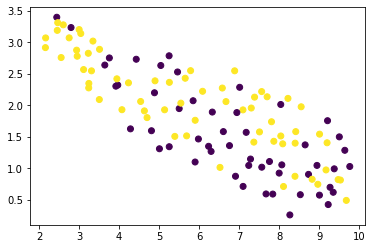

In [15]:
draw_umap(scaled_df, y, n_components=2, n_neighbors=40)

In [16]:
scaled_df

,Plasma renin activity,Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article,Oxygen saturation,17α-Hydroxyprogesterone,Anti ds-DNA,Reticulocyte hemoglobin equivalent,Fibrinogen,Procalcitonin,SHBG -more detailed ranges in SHBG article,[H+],...,LDL cholesterol (Not valid when triglycerides >5.0 mmol/L),Luteinizing hormone (LH)-more detailed menstrual cycle ranges in separate diagram,Alpha 1-antitrypsin (AAT),Eosinophil cationic protein (ECP),Absolute content of carbon dioxide (CO2),Chloride (Cl),Amylase,IgM,Copper (Cu),Viscosity
0,-0.608446,0.888516,0.163281,-0.706935,-0.581061,-0.818857,-0.743022,-0.542813,-0.800350,-0.338222,...,-0.836165,-0.860983,0.719448,-0.851516,-1.045997,-0.559470,-0.464146,-0.659920,1.129705,-0.869063
1,-0.680225,-0.307084,0.253089,-0.757793,-0.634323,-0.852364,-0.794262,-0.588100,-0.799233,-0.482380,...,-0.790434,-0.900399,-0.075934,-0.919826,-0.336481,-0.659190,-0.024297,-0.701282,-1.388092,-0.920676
2,2.562353,0.581142,0.309802,1.866656,2.120181,2.431090,3.571763,2.870224,2.038830,3.447345,...,1.472169,1.878212,-0.623890,2.996246,0.736863,2.153884,-1.035956,2.437581,0.950992,2.254295
3,0.001253,1.514539,-0.543892,-0.139071,-0.175681,-0.019217,-0.122574,-0.175481,-0.013962,0.057796,...,-0.148486,-0.157087,1.254403,-0.146353,-0.938895,-0.164373,0.055158,-0.093652,-0.484452,-0.117207
4,-0.132761,1.355796,0.115813,-0.449307,-0.111574,-0.452023,0.124908,0.195675,-0.506542,0.346992,...,-0.458284,-0.640470,1.321461,-0.354396,0.160827,-0.269232,0.593325,-0.133522,-0.761913,-0.586766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,-0.075524,0.534999,0.200346,0.241549,0.200225,0.132268,0.026060,0.171219,0.184540,0.131879,...,-0.232362,0.325864,-0.952404,0.463821,1.649565,0.297484,-1.092748,0.050640,-0.271989,0.368775
112,-0.338438,0.237314,1.245253,-0.226854,-0.076856,-0.282913,-0.222072,-0.123460,-0.193686,-0.385776,...,-0.065411,-0.170027,-0.404426,-0.244730,0.200933,-0.421444,-0.585737,-0.160997,-1.381007,-0.203760
113,0.699561,-0.319997,-1.304119,1.002224,1.285999,0.769095,1.080090,1.374172,0.832229,1.100946,...,0.552174,1.024079,0.923025,1.278875,-0.227982,1.029520,0.189586,1.018203,3.221676,1.077897
114,-0.334533,0.899270,-0.655941,-0.132377,0.334408,-0.368975,0.144575,0.369054,-0.320910,0.002989,...,-0.208176,-0.067439,-0.722403,0.070678,0.301174,-0.289940,0.974255,0.042872,0.414661,-0.083393


In [17]:
# outliers_threshold = 3
# filter_mask = (scaled_df < outliers_threshold) & (scaled_df > -outliers_threshold)

# scaled_df[filter_mask]

#### Hanterar först obalans mellan training data och test data

In [18]:
short_scaled_df = scaled_df.filter(items=scaled_df.columns[:10])
x_train, x_test, y_train, y_test = train_test_split(short_scaled_df, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [19]:
y_train.value_counts()

1    51
0    41
Name: Outcome, dtype: int64

In [20]:
y_test.value_counts()

1    13
0    11
Name: Outcome, dtype: int64

## baseline

In [21]:
clf_svm = SVC(kernel='rbf')
clf_svm.fit(x_train, y_train)

SVC()

In [22]:
train_score = clf_svm.score(x_train, y_train)
test_score = clf_svm.score(x_test, y_test)

print(f'Train score: {train_score}')
print(f'Test score: {test_score}')

Train score: 0.7282608695652174
Test score: 0.5


In [23]:
predictions = clf_svm.predict(x_test)
y_pred = predictions
y_true = y_test.to_numpy()

# True then prediction
score = f1_score(y_true, y_pred)
beta_score = fbeta_score(y_true, y_pred, average='binary', beta=0.5)

print(f'The f1 score is: {score}')
print(f'The fbeta scora is: {beta_score}')


The f1 score is: 0.5999999999999999
The fbeta scora is: 0.5555555555555556


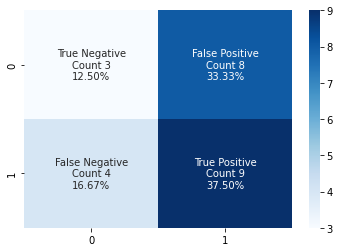

In [24]:
c_matrix = confusion_matrix(y_true, y_pred)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = [f'Count {value}' for value in c_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in c_matrix.flatten() / np.sum(c_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

## Model

In [25]:
x_train, x_test, y_train, y_test = train_test_split(short_scaled_df, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
kernels = ['rbf']
gammas = [1.2, 0.5, 0.3]
#cs = np.linspace(0.1, 100, num=10)
cs = [0.2*x + 1 for x in range(30)]
scores = []
for kernel in kernels:
    for gamma in gammas:
        for c in cs:
            model = SVC(kernel=kernel, C=c, gamma=gamma)
            model.fit(x_train, y_train)
            
            y_pred = model.predict(x_test)
            y_true = y_test.to_numpy()
            beta_score = f1_score(y_true, y_pred)
            scores.append(beta_score)

print(np.unique(scores, return_counts=True))
            

(array([0.60869565, 0.61538462, 0.64      , 0.64285714, 0.66666667,
       0.66666667, 0.68965517, 0.69230769, 0.75862069, 0.77419355]), array([ 9,  5, 30, 12,  2,  4,  4, 10, 12,  2]))


In [26]:
x_train, x_test, y_train, y_test = train_test_split(concat_df, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
kernels = ['linear']
cs = np.linspace(0.000000001, 5, num=10)
#cs = [0.2*x + 1 for x in range(30)]
scores = []
for kernel in kernels:
    for c in cs:
        model = SVC(kernel=kernel, C=c)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_true = y_test.to_numpy()
        beta_score = f1_score(y_true, y_pred)
        scores.append(beta_score)

print(np.unique(scores, return_counts=True))

(array([0.57142857, 0.8       ]), array([1, 9]))


In [27]:
print(scores)

[0.5714285714285714, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]


In [28]:
concat_df.head()

,Plasma renin activity,Aldosterone-to-renin ratio -more detailed ranges in Aldosterone/renin ratio article,Oxygen saturation,17α-Hydroxyprogesterone,Anti ds-DNA,Reticulocyte hemoglobin equivalent,Fibrinogen,Procalcitonin,SHBG -more detailed ranges in SHBG article,[H+],...,LDL cholesterol (Not valid when triglycerides >5.0 mmol/L),Luteinizing hormone (LH)-more detailed menstrual cycle ranges in separate diagram,Alpha 1-antitrypsin (AAT),Eosinophil cationic protein (ECP),Absolute content of carbon dioxide (CO2),Chloride (Cl),Amylase,IgM,Copper (Cu),Viscosity
0,1202.682830,13.385237,9.050151,10167.302316,797.792621,1990.588651,6678.058526,368.820137,9798.991675,2541.446357,...,4695.972541,11867.459367,11.093185,2287.734608,1.276036,9691.433098,5.078782,5723.043583,13.137237,8709.946358
1,1179.717959,6.448836,9.602964,10022.168797,787.615353,1971.122284,6589.067027,365.070718,9801.947930,2447.093166,...,4751.606350,11721.050498,6.800842,2239.021568,5.392509,9406.856573,7.622103,5665.461449,0.163346,8572.349573
2,2217.133047,11.601976,9.952065,17511.626410,1313.947364,3878.640667,14171.849207,651.391892,17311.001957,5019.155940,...,7504.186817,22042.039916,3.843753,5031.636306,11.619832,17434.643530,1.772427,10035.302924,12.216350,17036.582293
3,1397.746758,17.017175,4.697142,11787.832022,875.252868,2455.138448,7755.634024,399.232271,11879.647511,2800.645861,...,5532.571313,14482.040171,13.980113,2790.598041,1.897418,10818.936910,8.081534,6511.386851,4.819691,10714.337336
4,1354.870994,16.096213,8.757959,10902.503927,887.502415,2203.700018,8185.453304,429.960946,10576.360821,2989.929244,...,5155.684969,12686.540949,14.341997,2642.239004,8.277790,10519.695105,11.193355,6455.881915,3.389969,9462.528364
